In [1]:
import os
import re
import pathlib
import time
import itertools
import glob
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from IPython import display

from generator import *
from discriminator import *
from loss import *
from utils import *

%load_ext autoreload

In [17]:
city = 'nyc'
date = 'dec-21'
zoom = 15
shadow_path = 'e://Dropbox/vgc//shadow-slippy-vis//www//assets//%s-%s//'%(city,date)
height_path = 'data/%s-heights/'%(city)
checkpoint_path = './training_checkpoints/%s-%s'%(city,date)

In [18]:
generator = Generator()
discriminator = Discriminator()
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [19]:
checkpoint_prefix = os.path.join(checkpoint_path, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [26]:
train_dataset, test_dataset = get_train_test(height_path, shadow_path, city, date, zoom)

1005


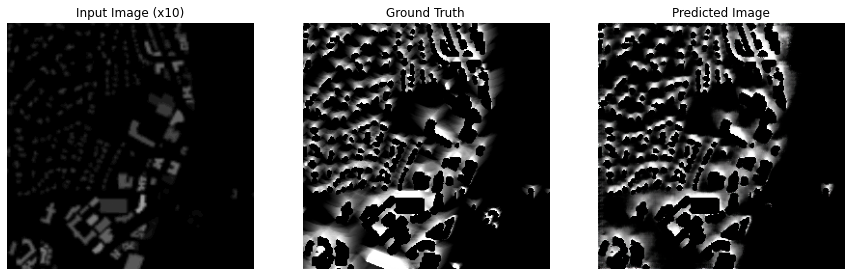

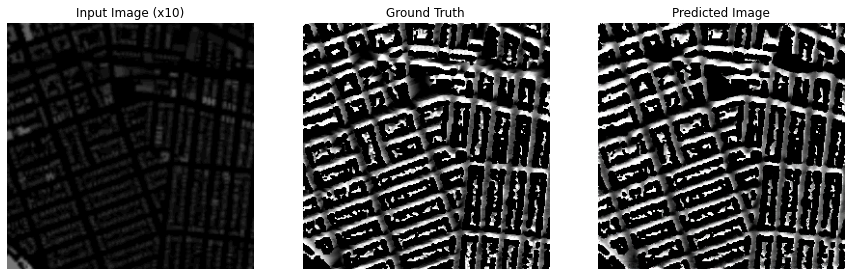

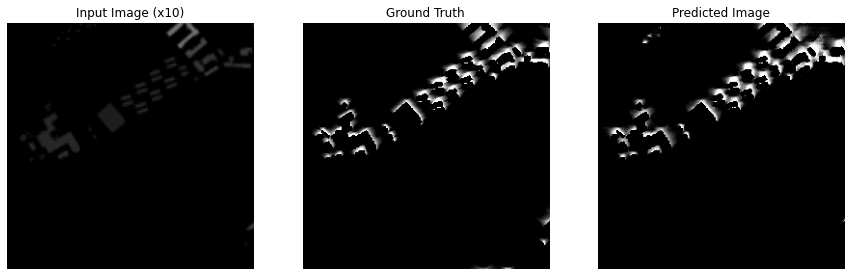

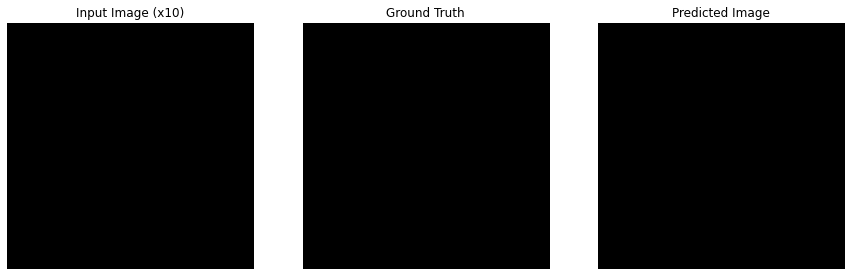

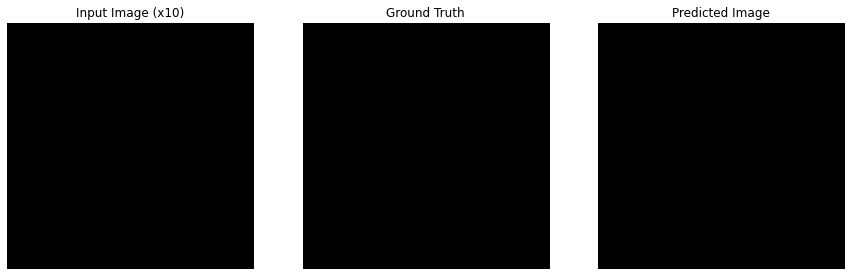

In [28]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_path))
for example_input, example_output in test_dataset.take(5):
    generate_images(generator, example_input, example_output)

In [31]:
rmses = []
for test_input, test_target in test_dataset:
    prediction = generator(test_input, training=True)
    
    test_input = test_input.numpy()
    test_target = test_target.numpy()
    prediction = prediction.numpy()
    
    test_input = test_input * 0.5 + 0.5
    test_target = test_target * 0.5 + 0.5
    prediction = prediction * 0.5 + 0.5
    
    rmse = np.sqrt(np.mean((prediction-test_target)**2))
    rmses.append(rmse)
    
#     plt.figure(figsize=(15, 15))
#     plt.subplot(1, 2, 1)
#     plt.title('Target')
#     plt.imshow(test_target[0,:,:,:])
#     plt.axis('off')
    
#     plt.subplot(1, 2, 2)
#     plt.title('Prediction')
#     plt.imshow(prediction[0,:,:,:])
#     plt.axis('off')
    
#     plt.show()
print(np.average(rmses))
df = pd.DataFrame(rmses, columns=['rmse'])
df.to_csv('results/%s-%s-%d.csv'%(city,date,zoom), index=False, header=True)

0.078763574
